In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
df = pd.read_csv('/content/loan.csv')

<ipython-input-2-863b1cbfb6e2>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/loan.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [ ]:
# Check columns which has no records
df.columns[df.isnull().sum() == df.shape[0]]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [ ]:
# Remove all columns which has no records.
df.drop(df.columns[df.isnull().sum() == df.shape[0]], axis=1, inplace=True)

In [ ]:
#check rows and columns
df.shape

(39717, 57)

In [ ]:
# check columns name
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [ ]:
# Drop column which has all unique values.
for x in df.columns:
  if df[x].nunique() == 1:
    print(x)
    df.drop(x, axis=1, inplace=True)


pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [ ]:
# find rows
len(df.columns)

48

In [ ]:
# Checked final columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [ ]:
#object_col = [x for x in df.columns if df[x].dtype == 'object']

In [ ]:
# Remove '%' from the column.
df['int_rate'] = df['int_rate'].apply(lambda x : float(x[:-1]) if x[-1:] == '%' else float(x))

In [ ]:
# Extract month numbers from the column and created new
df['term_m'] = df['term'].apply(lambda x : int(x.rstrip(' months')))

In [ ]:
# Display all columns
pd.set_option('display.max_columns', None)
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,term_m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,36
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,60
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,36
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,36
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,60


In [ ]:
# Get null values by percentage of each column.
round(df.isnull().sum()/len(df.index),2) * 100

id                          0.0
member_id                   0.0
loan_amnt                   0.0
funded_amnt                 0.0
funded_amnt_inv             0.0
term                        0.0
int_rate                    0.0
installment                 0.0
grade                       0.0
sub_grade                   0.0
emp_title                   6.0
emp_length                  3.0
home_ownership              0.0
annual_inc                  0.0
verification_status         0.0
issue_d                     0.0
loan_status                 0.0
url                         0.0
desc                       33.0
purpose                     0.0
title                       0.0
zip_code                    0.0
addr_state                  0.0
dti                         0.0
delinq_2yrs                 0.0
earliest_cr_line            0.0
inq_last_6mths              0.0
mths_since_last_delinq     65.0
mths_since_last_record     93.0
open_acc                    0.0
pub_rec                     0.0
revol_ba

In [ ]:
# Remove columns which has null values
df.drop(df.columns[round(df.isnull().sum()/len(df.index),2) * 100 > 30],axis=1, inplace=True)

In [ ]:
round(df.isnull().sum()/len(df.index),2) * 100

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  6.0
emp_length                 3.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
url                        0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prnc

In [ ]:
# Remove rows where emp_length is nan.
df = df[~df['emp_length'].isnull()]

In [ ]:
round(df.isnull().sum()/len(df.index),2) * 100

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  4.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
url                        0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prnc

In [ ]:
# import regular expression to extract numer values from the string
import re
df['emp_length'] = df['emp_length'].apply(lambda x: int(re.findall('\d+', str(x))[0]))


##Analysis

<Axes: >

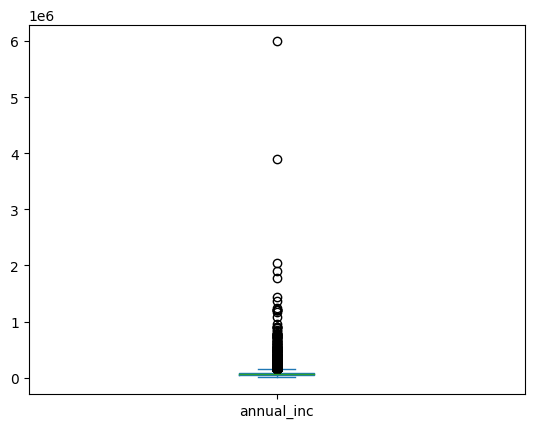

In [ ]:
df['annual_inc'].plot.box()

In [ ]:
# Consideration : Before give loan to borrower bank check few details.
# annual_inc, own property, past history

<Axes: >

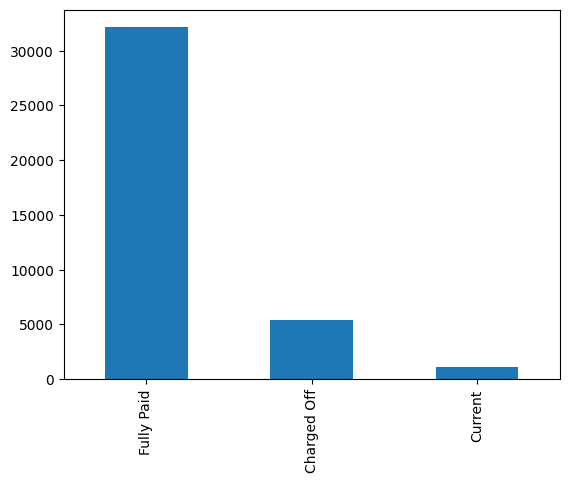

In [ ]:
df['loan_status'].value_counts().plot.bar()

In [ ]:
# we will remove records of 'current' loan status, to check past history of the borrower.
df = df[df['loan_status'] != 'Current']

In [ ]:
# create a new column with 0 and 1 based on label of loan status.
df['loan_status_n'] = df['loan_status'].apply(lambda x : 0 if x == 'Fully Paid' else 1)

<ipython-input-113-9acf498f3573>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status_n'] = df['loan_status'].apply(lambda x : 0 if x == 'Fully Paid' else 1)


In [ ]:
# Visualise the graph with below features.
# loan_amnt, funded_amnt, term, int_rate, grade, sub_grade, emp_length, home_ownership, annual_inc, issue_d, purpose, title, dti

## Visualization

In [ ]:
# Create a function with common properties of graph.
def generate_graph(ys, x_label, title):
  plt.figure(figsize=(8, 6))
  plt.title(title)
  sns.barplot(data=df, x=ys, y='loan_status_n')
  plt.xlabel(x_label)
  plt.ylabel('Loan status')
  plt.xticks(rotation=80)
  plt.show()

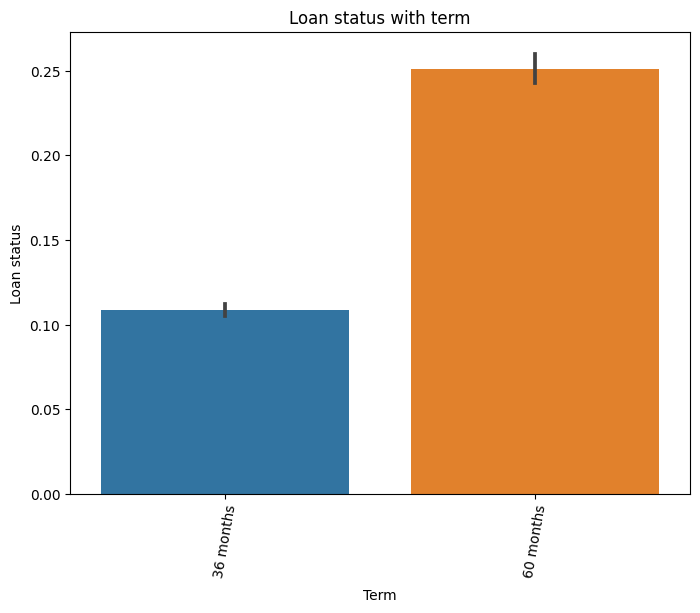

In [ ]:
# create a graph with term variable and check default rate.
generate_graph('term', 'Term', 'Loan status with term')


It seems a people who took the loan with the 60 months term, There may be a high default rate.

In [ ]:
# create a graph with grade variable and check default rate.
df['grade'].value_counts()

B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

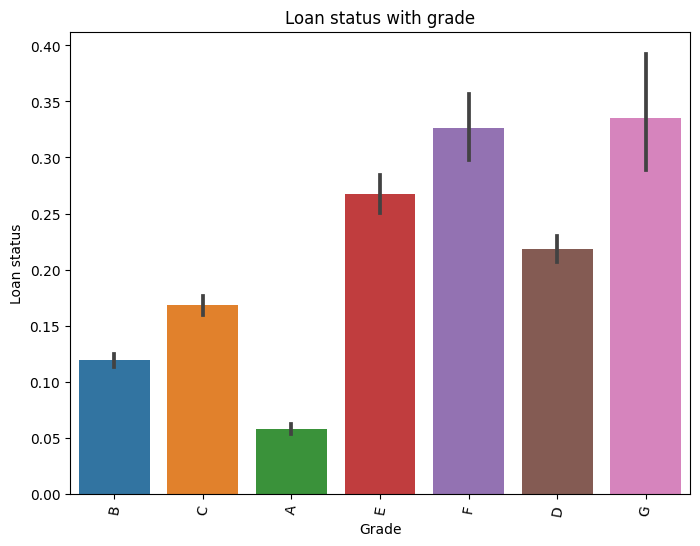

In [ ]:
generate_graph('grade', 'Grade', 'Loan status with grade')
#df['grade'].dtype

Default rates are high with grade F and G

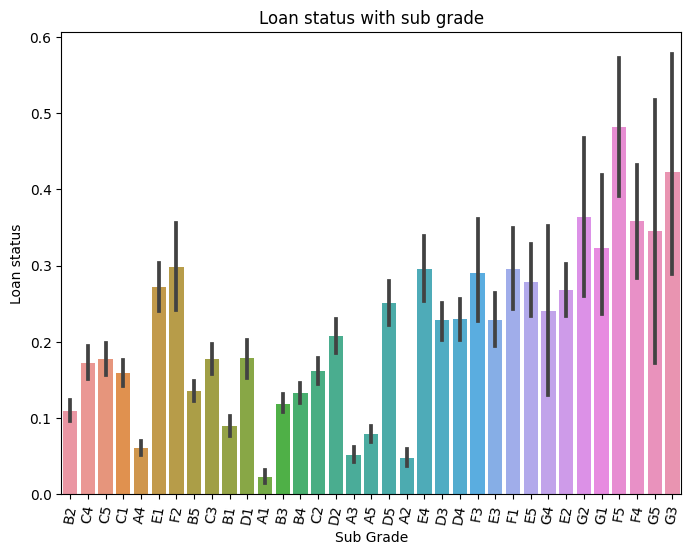

In [ ]:
# create a graph with sub grade variable and check default rate.
generate_graph('sub_grade', 'Sub Grade', 'Loan status with sub grade')

There is a high risk of default with sub grade F5.

In [ ]:
df['emp_length'].value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

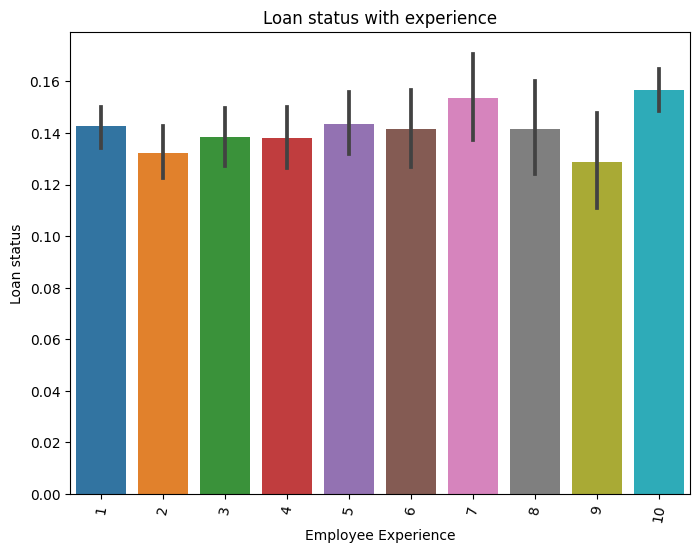

In [ ]:
## create a graph with employee length (Experience) variable and check default rate.
generate_graph('emp_length', 'Employee Experience', 'Loan status with experience')

There is a high risk of default with 10 years of experience of employee.

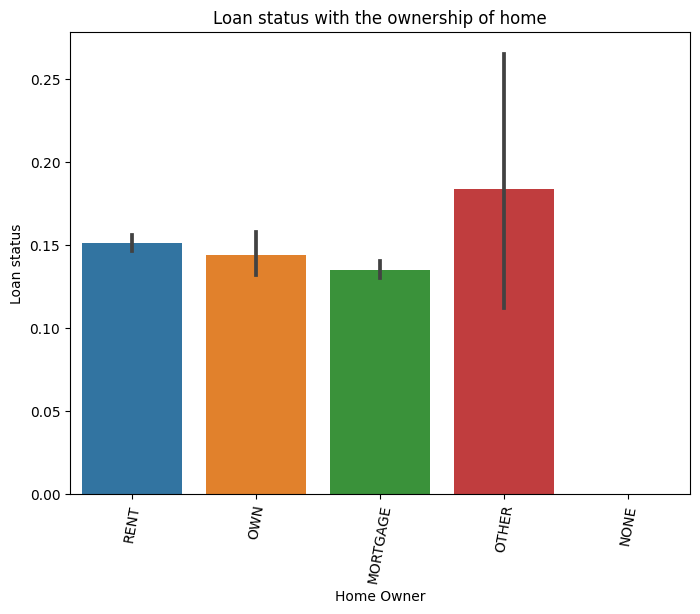

In [ ]:
# create a graph with home ownership variable and check default rate.
generate_graph('home_ownership', 'Home Owner', 'Loan status with the ownership of home')

There is a high risk of default with the person who selected 'other' option.

In [ ]:
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

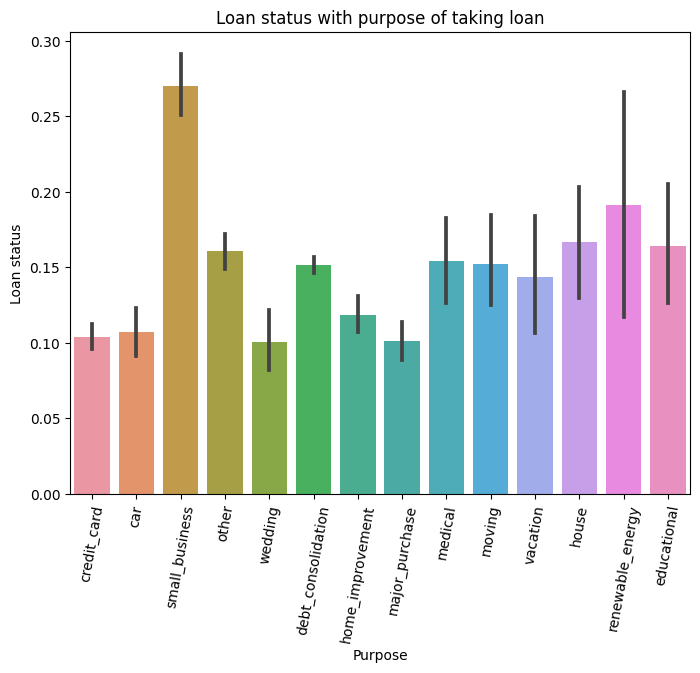

In [ ]:
# create a graph with purpose variable and check default rate.
generate_graph('purpose', 'Purpose', 'Loan status with purpose of taking loan')


There is a high risk of default when borrower take loan with small business purpose.

In [ ]:
df['loan_amnt'].value_counts()

10000    2742
12000    2213
5000     1959
6000     1834
15000    1805
         ... 
34525       1
13275       1
11275       1
23275       1
22550       1
Name: loan_amnt, Length: 866, dtype: int64

In [ ]:
#df['loan_amnt']
#Loan amount variable divided into groups.
pd.qcut(df['loan_amnt'], q=[0,.25,.50,.75,1]).value_counts()

(5500.0, 10000.0]     11911
(499.999, 5500.0]      9593
(15000.0, 35000.0]     8487
(10000.0, 15000.0]     7553
Name: loan_amnt, dtype: int64

In [ ]:
# function to create a groups with divided amount.
def set_loan_amnt(x):
  if x < 5500:
    return 'Low'
  elif x >=5500 and x < 10000:
    return 'Medium'
  elif x >=10000 and x < 15000:
    return 'High'
  else:
    return 'Very High'

In [ ]:
#create a new column with the created groups.
df['loan_amnt_cat'] = df['loan_amnt'].apply(lambda x : set_loan_amnt(x))

In [ ]:
df['loan_amnt_cat'].value_counts()

Very High    10292
Medium        9411
Low           9351
High          8490
Name: loan_amnt_cat, dtype: int64

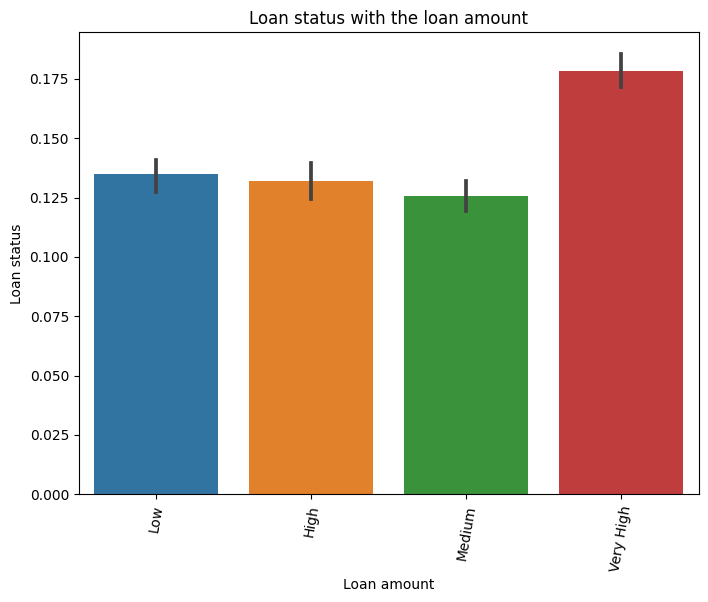

In [ ]:
# create a graph with Loan amount variable and check default rate.
generate_graph('loan_amnt_cat', 'Loan amount', 'Loan status with the loan amount')

There is a high risk of default when amount is high

In [ ]:
# Binning : funded amount is divided into segment
pd.qcut(df['funded_amnt'], q=[0,.25,.50,.75,1]).value_counts()

(9600.0, 15000.0]     10570
(5400.0, 9600.0]       9488
(499.999, 5400.0]      9455
(15000.0, 35000.0]     8031
Name: funded_amnt, dtype: int64

In [ ]:
# function to create a group based on funded amount
def set_funded_amnt(x):
  if x < 5400:
    return 'Low'
  elif x >=5400 and x < 9600:
    return 'Medium'
  elif x >=9600 and x < 15000:
    return 'High'
  else:
    return 'Very High'

In [ ]:
#Create a new column with categories of funded amount
df['funded_amnt_cat'] = df['funded_amnt'].apply(lambda x : set_loan_amnt(x))

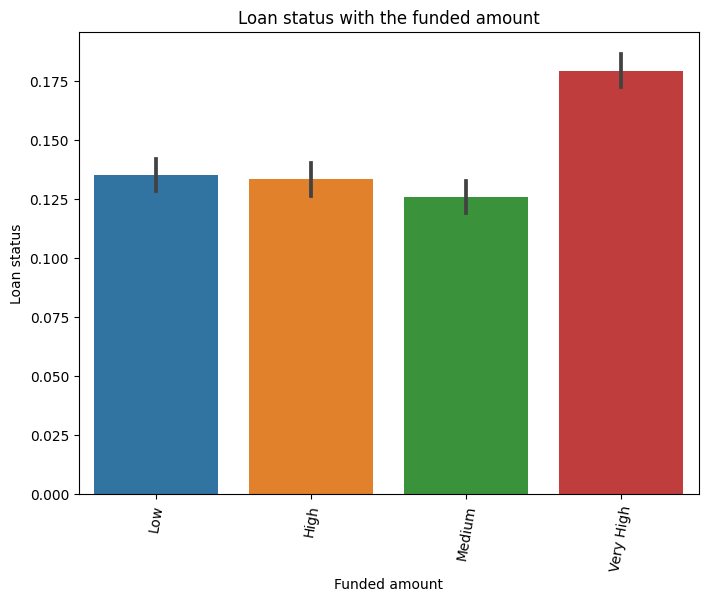

In [ ]:
# create a graph with funded amount variable and check default rate.
generate_graph('funded_amnt_cat', 'Funded amount', 'Loan status with the funded amount')

There is a high risk of default when amount is high

In [ ]:
# divide interest rate in 3 segment.
pd.qcut(df['int_rate'], q=3).value_counts()
#df['int_rate'].describe()

(5.419, 10.37]    12849
(10.37, 13.49]    12669
(13.49, 24.4]     12026
Name: int_rate, dtype: int64

In [ ]:
# function to set categories
def set_int_rate(x):
  if x > 5.419 and x < 10.38 :
    return 'Low'
  elif x >=10.38 and x < 13.50:
    return 'Medium'
  elif x >=13.50 and x < 24.5:
    return 'High'


In [ ]:
#create a new column with interest rate category.
df['int_rate_cat'] = df['int_rate'].apply(lambda x : set_int_rate(x))

In [ ]:
df['int_rate_cat'].value_counts()

Low       12849
Medium    12669
High      12026
Name: int_rate_cat, dtype: int64

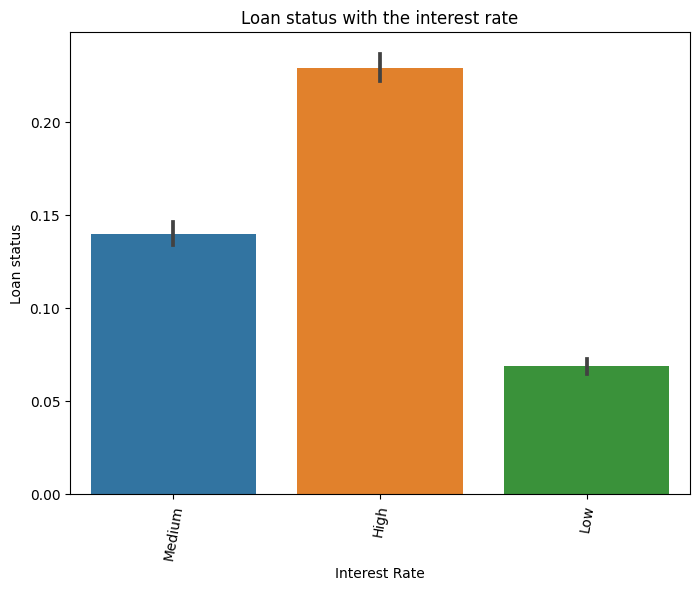

In [ ]:
# create a graph with interest rate variable and check default rate.
generate_graph('int_rate_cat', 'Interest Rate', 'Loan status with the interest rate')

There is a high risk of default when interest rate is high

In [ ]:
df['annual_inc'].min()

4000.0

In [ ]:
df['annual_inc'].max()

6000000.0

In [ ]:
#create annual income in segments.
pd.qcut(df['annual_inc'], q=[0,.25,.50,.75,1]).value_counts()

NameError: ignored

In [ ]:
# create function to set categories of annual income.
def set_annual_inc(x):
  if x >=3999 and x < 41000:
    return 'Low'
  elif x >=41000 and x < 60000:
    return 'Medium'
  elif x >=60000 and x < 83000:
    return 'High'
  else:
    return 'Very High'

In [ ]:
# Create a new column to set categories of annual income.
df['annual_inc_cat'] = df['annual_inc'].apply(lambda x : set_annual_inc(x))

In [ ]:
df['annual_inc_cat'].value_counts()

High         9419
Very High    9419
Medium       9407
Low          9299
Name: annual_inc_cat, dtype: int64

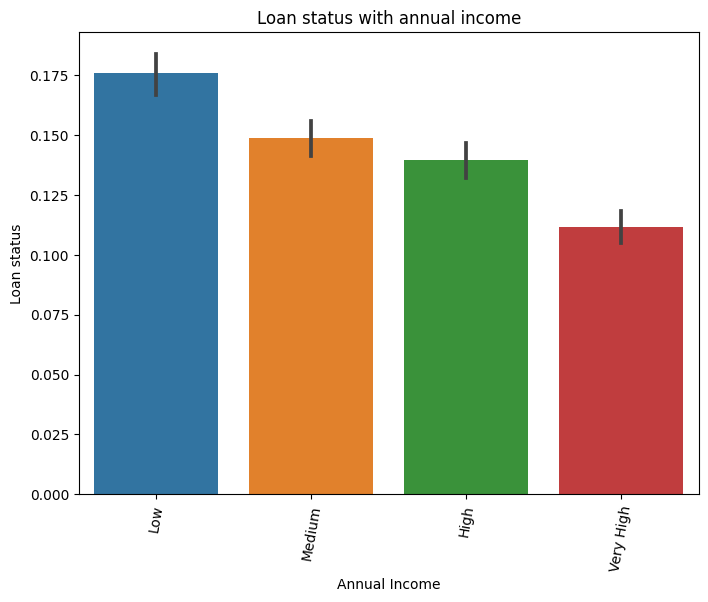

In [ ]:
# create a graph with annual income variable and check default rate.
generate_graph('annual_inc_cat', 'Annual Income', 'Loan status with annual income')

There is a high risk of default where annual income is low.

In [ ]:
# extract month and year from issue date.
df['issue_d'] = df['issue_d'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [ ]:
df['month'] = df['issue_d'].apply(lambda x : x.month)
df['year'] = df['issue_d'].apply(lambda x : x.year)

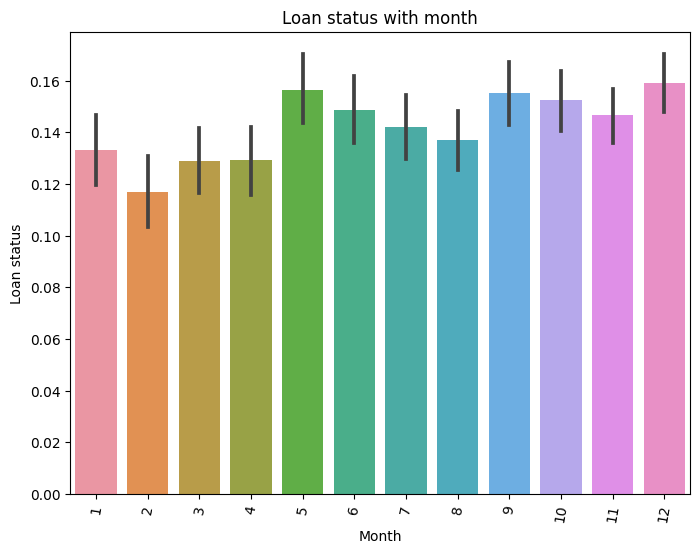

In [ ]:
# create a graph with month variable and check default rate.
generate_graph('month', 'Month', 'Loan status with month')

The default rate is high in the month of May and December.

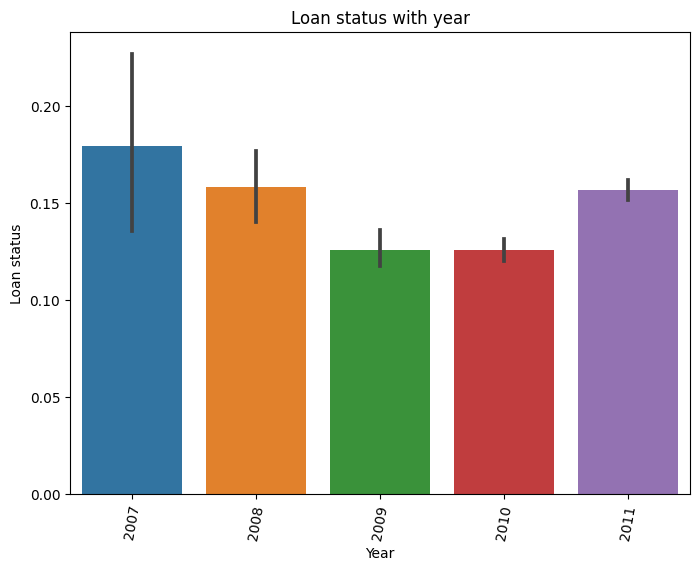

In [ ]:
# create a graph with year variable and check default rate.
generate_graph('year', 'Year', 'Loan status with year')

The default rate is high in the year of 2007 followed by 2008

In [ ]:
df['dti'].value_counts()

0.00     168
18.00     44
12.00     44
19.20     39
13.20     38
        ... 
29.78      1
25.73      1
29.48      1
25.60      1
25.43      1
Name: dti, Length: 2848, dtype: int64

In [ ]:
# dti percentage divided in to 3 bins.
pd.qcut(df['dti'], q=3).value_counts()

(-0.001, 9.99]    12517
(9.99, 16.71]     12517
(16.71, 29.99]    12510
Name: dti, dtype: int64

In [ ]:
# create a function to set the categories based on dti group.
def set_dti(x):
  if x >= -0.001 and x < 9.99 :
    return 'Low'
  elif x >=9.99 and x < 16.71:
    return 'Medium'
  elif x >=16.71 and x < 29.99:
    return 'High'

In [ ]:
# create a new column to set labels.
df['dti_cat'] = df['dti'].apply(lambda x : set_dti(x))

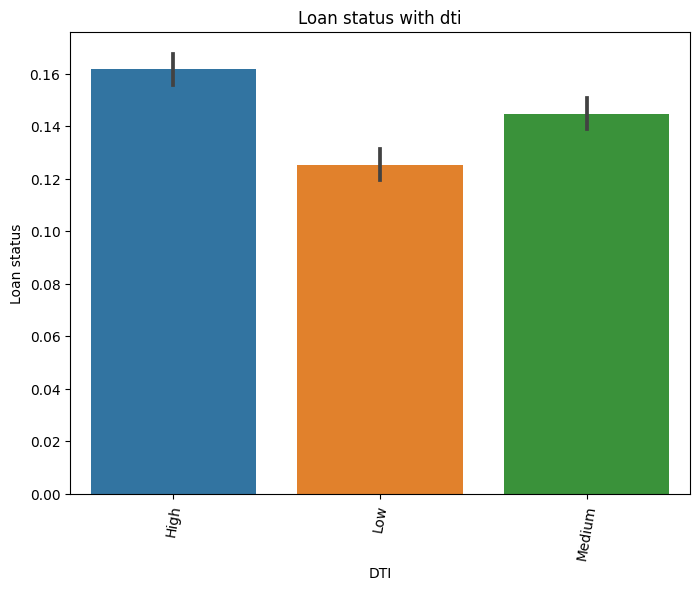

In [ ]:
# create a graph with dti variable and check default rate.
generate_graph('dti_cat', 'DTI', 'Loan status with dti')

The default rate is high when dti is high.

# Segmented univariate

In [ ]:
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

<Axes: xlabel='purpose', ylabel='count'>

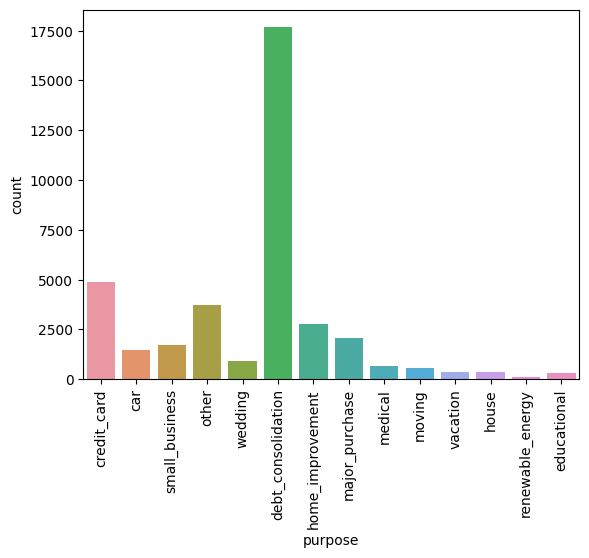

In [ ]:
# checking purpose for loan.
plt.xticks(rotation=90)
sns.countplot(data=df, x='purpose')


In [ ]:
#Get 4 highest purposes of loan
purpose_cat = ['credit_card', 'debt_consolidation','home_improvement','major_purchase']
df = df[df['purpose'].isin(purpose_cat)]

In [ ]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_m,loan_status_n,loan_amnt_cat,funded_amnt_cat,int_rate_cat,annual_inc_cat,month,year,dti_cat
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-15,171.62,May-16,0.0,36,0,Low,Low,Medium,Low,12,2011,High
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.0,0.0,0.00,May-16,1313.76,May-16,0.0,60,0,Medium,Medium,High,Medium,12,2011,High
10,1070078,1305201,6500,6500,6500.0,60 months,14.65,153.45,C,C3,Southwest Rural metro,5,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.0,0.0,0.00,Jun-13,1655.54,Dec-15,0.0,60,0,Medium,Medium,High,High,12,2011,Medium
11,1069908,1305008,12000,12000,12000.0,36 months,12.69,402.54,B,B5,UCLA,10,OWN,75000.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Consolidation,913xx,CA,10.78,0,Oct-89,0,12,0,23336,67.10%,34,0.0,0.0,13947.989160,13947.99,12000.00,1947.99,0.0,0.0,0.00,Sep-13,6315.30,Aug-13,0.0,36,0,High,High,Medium,High,12,2011,Medium
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,4,0,10452,91.70%,9,0.0,0.0,2270.700000,2270.70,1256.14,570.26,0.0,444.3,4.16,Jul-12,305.38,Nov-12,0.0,36,1,Medium,Medium,Medium,Low,12,2011,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,92402,92390,5000,5000,700.0,36 months,8.70,158.30,B,B1,"A. F. Wolfers, Inc.",5,MORTGAGE,75000.0,Not Verified,2007-07-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Reduce Credit Card Debt,804xx,CO,15.55,0,May-94,0,10,0,66033,23%,29,0.0,0.0,5698.603286,797.80,5000.00,698.60,0.0,0.0,0.00,Jul-10,159.83,Nov-14,NaN,36,0,Low,Low,Low,High,7,2007,Medium
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,FiSite Research,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.0,0.0,0.00,Jul-10,80.90,Jun-10,NaN,36,0,Low,Low,Low,Very High,7,2007,Medium
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.0,0.0,0.00,Jul-10,281.94,Jul-10,NaN,36,0,Medium,Medium,Low,Low,7,2007,Low
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,NaN,1,MORTGAGE,1000

In [ ]:
# create a function to visualize graphs with all the variable.
def generate_seg_graph(ys,y_label):
  plt.figure(figsize=(8, 6))
  sns.barplot(data=df, x=ys, y='loan_status_n', hue='purpose')
  plt.xlabel(y_label)
  plt.ylabel('Loan status')
  plt.xticks(rotation=80)
  plt.show()

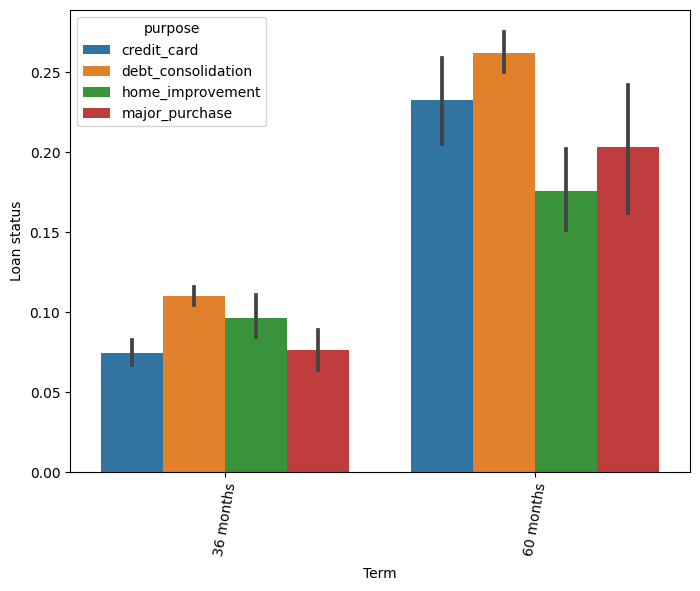

In [ ]:
# show graph with with respect to loan status and group of selected purpose for term variable.
generate_seg_graph('term','Term')

The default rate is high when purpose are debt consolidation, credit card, home improvement and major purchase  and term is 60 months.

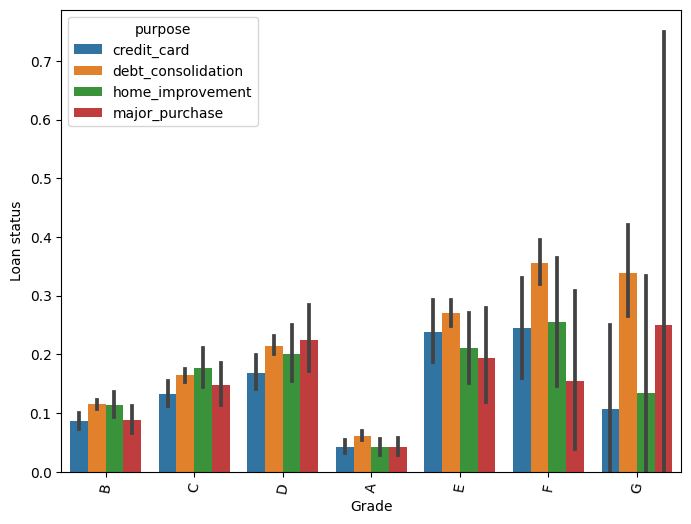

In [ ]:
# show graph with with respect to loan status and group of selected purpose for grade variable.
generate_seg_graph('grade','Grade')

The default rate is high when purpose is debt consolidation and grade F followed by G

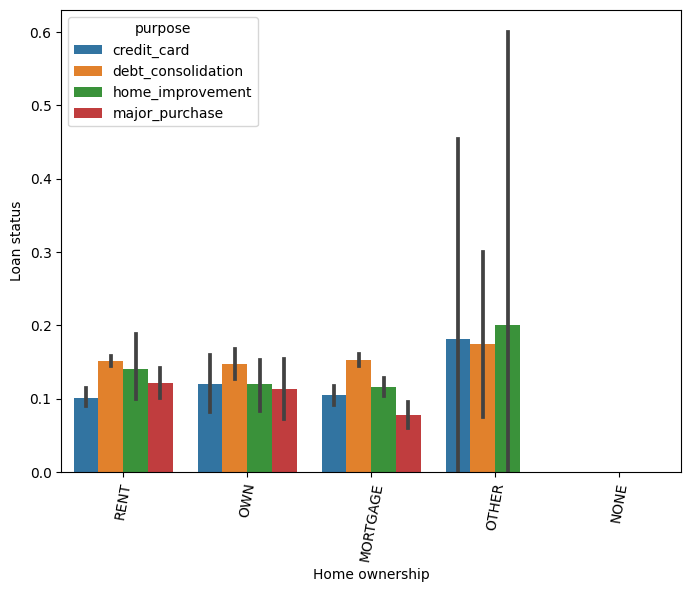

In [ ]:
# show graph with with respect to loan status and group of selected purpose for home ownership variable.
generate_seg_graph('home_ownership','Home ownership')

The default rate is high when purpose are debt consolidation, credit card, home improvement  and home ownership is other.

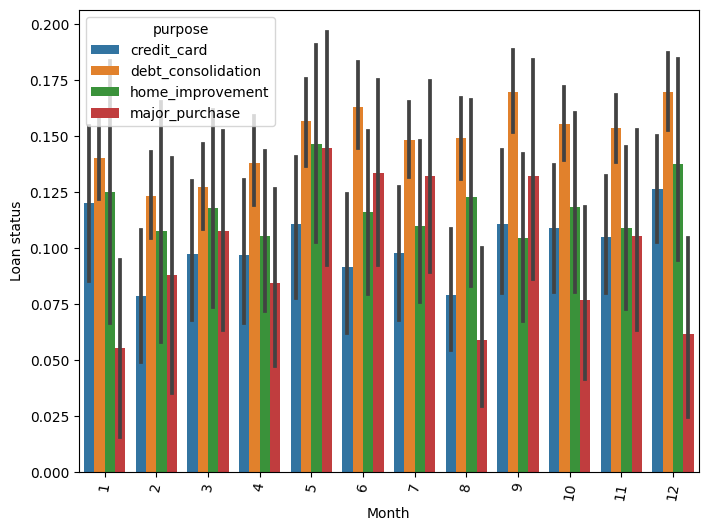

In [ ]:
# show graph with with respect to loan status and group of selected purpose for month variable.
generate_seg_graph('month','Month')

The default rate is high when purpose is debt consolidation and months are 6, 9 and 12

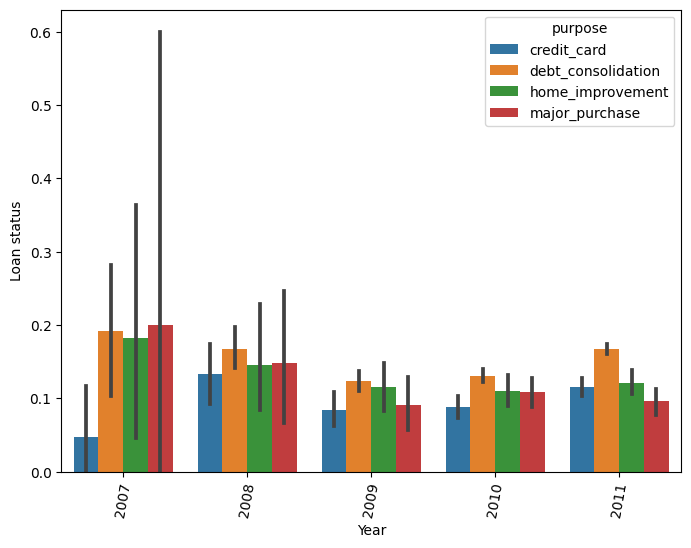

In [ ]:
# show graph with with respect to loan status and group of selected purpose for year variable.
generate_seg_graph('year','Year')

The default rate is high when purpose are debt consolidation, home improvement and major purchase  and year is 2007.  whereas default rate in 2008 with all selected purpose is high.

In [ ]:
#loan_amnt_cat, funded_amnt_cat, int_rate_cat, annual_inc_cat,  dti_cat

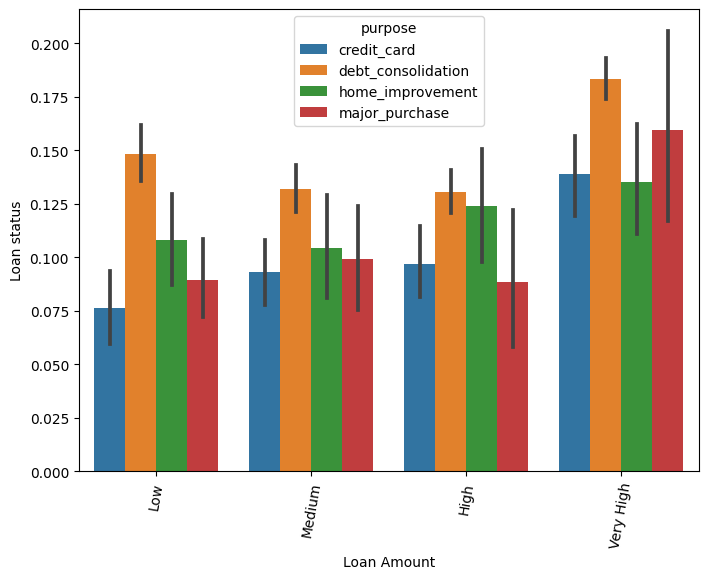

In [ ]:
# show graph with with respect to loan status and group of selected purpose for loan amount variable.
generate_seg_graph('loan_amnt_cat','Loan Amount')

The default rate is high when purpose are debt consolidation, home improvement, credit card and major purchase and loan amount is very high. The default rate is also high when loan amount is low but purpose is debt consolidation.

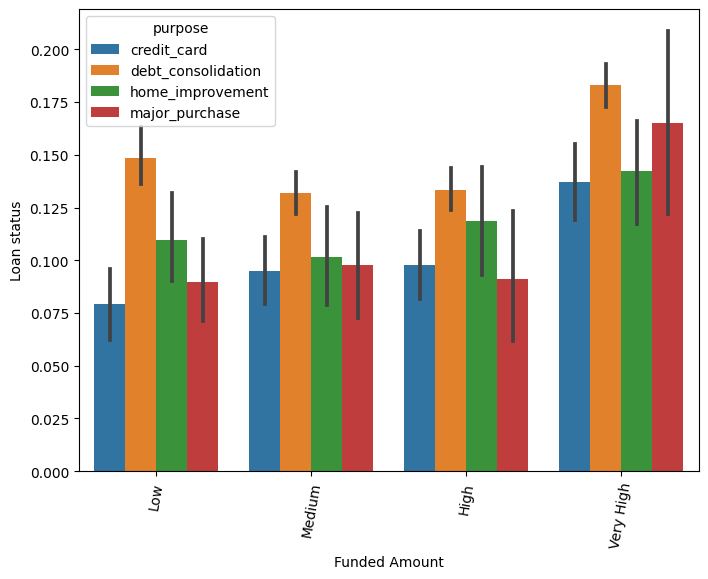

In [ ]:
# show graph with with respect to loan status and group of selected purpose for funded amount variable.
generate_seg_graph('funded_amnt_cat','Funded Amount')

The default rate is high when purpose are debt consolidation, home improvement, credit card and major purchase and funded amount is very high. The default rate is also high when funded amount is low but purpose is debt consolidation.

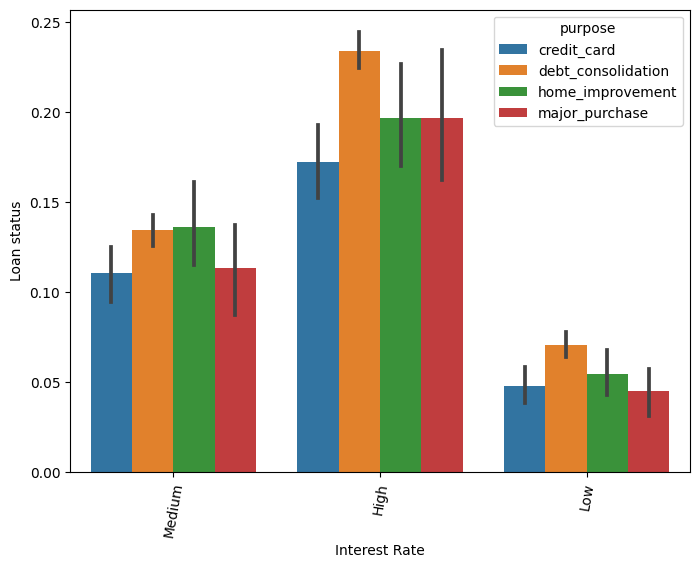

In [ ]:
# show graph with with respect to loan status and group of selected purpose for interest rate variable.
generate_seg_graph('int_rate_cat','Interest Rate')

The default rate is high when purpose are debt consolidation, home improvement, credit card and major purchase and interest rate is very high.

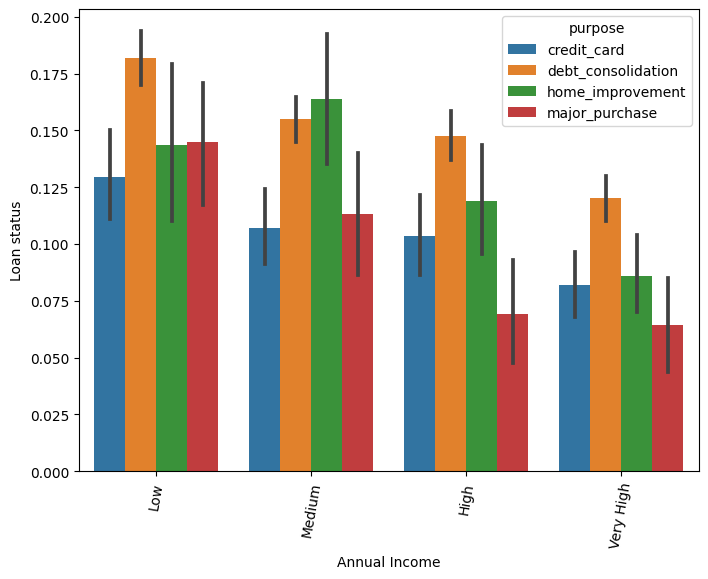

In [ ]:
# show graph with with respect to loan status and group of selected purpose for annual income variable.
generate_seg_graph('annual_inc_cat','Annual Income')

The default rate is high when purpose are debt consolidation, home improvement, credit card and major purchase and annual income is low followed by medium.

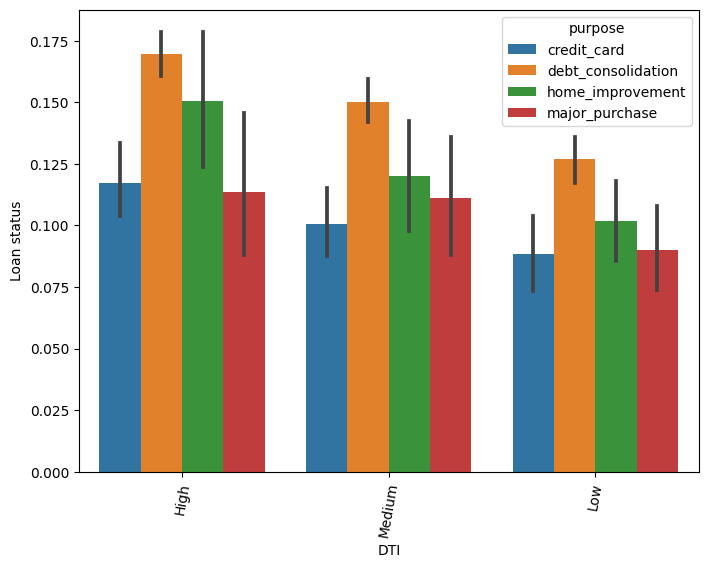

In [ ]:
# show graph with with respect to loan status and group of selected purpose for dti variable.
generate_seg_graph('dti_cat','DTI')

The default rate is high when purpose are debt consolidation, home improvement, credit card and major purchase and dti is very high.

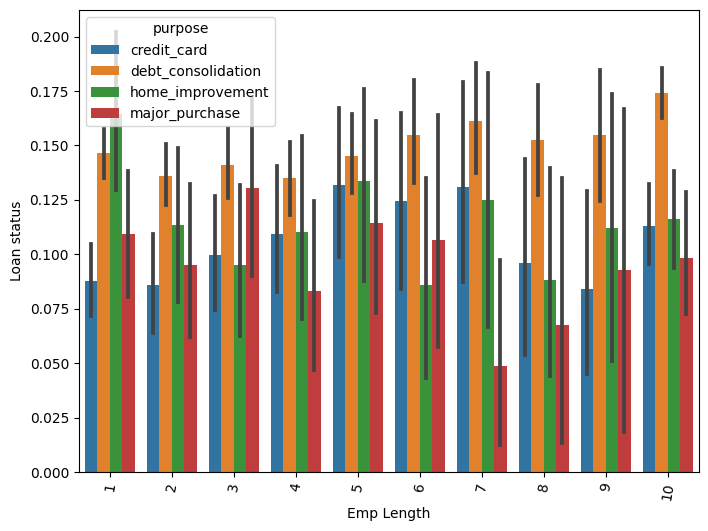

In [ ]:
generate_seg_graph('emp_length','Emp Length')

The default rate is high when purpose are debt consolidation and employee length is betwen 7 to 10.